<a href="https://colab.research.google.com/github/rpizarrog/innovacion-empresarial/blob/main/notebook_python/Explorar_datos_de_desercion_estudiantil.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Nombre**: Rubén ¨Pizarro Gurrola, rpizarro@itdurango.edu.mx
Febrero 2025



# Objetivo

Analizar y explorar descriptivamente el conjunto de datos de deservción escolar.

## Variables del conjunto de datos


# Desarrollo

Se va a realizar lo siguiente:

* Cargar librerías
* Cargar funciones adecuadas
* Cargar datos
* Identificar variables de interés cuantitativas y cualitativas del conjunto de datos
* Explorar y analizar descriptivamente las variables numéricas o cuntitativas
* Visualizar histograma de las variables numéricas de interés
* Explorar y analizar descriptivamente las variables de tipo categórica o cualitativas
* Visualizar con diagrama de barra


## Cargar librerías



In [9]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns # Tal vez se use
from scipy import stats # esatadísticos

import math


## Cargar funciones

Se cargan funciones personalizadas que se hacen anticipadamente para la ejecuión adecuada del caso


In [18]:

def f_cargar_datos(ruta_archivo, tipo='csv', hoja_excel=None, separador=','):
    """
    Carga datos desde un archivo especificado.

    Parámetros:
    - ruta_archivo (str): Ruta del archivo a cargar.
    - tipo (str): Tipo de archivo a cargar ('csv', 'excel', 'txt'). Por defecto es 'csv'.
    - hoja_excel (str): Nombre o índice de la hoja, en caso de ser un archivo Excel. Por defecto es None.
    - separador (str): Separador para archivos de texto o CSV. Por defecto es ','.

    Retorna:
    - DataFrame: Un DataFrame con los datos cargados.
    """
    try:
        if tipo == 'csv':
            datos = pd.read_csv(ruta_archivo, sep=separador)
        elif tipo == 'excel':
            datos = pd.read_excel(ruta_archivo, sheet_name=hoja_excel)
        elif tipo == 'txt':
            datos = pd.read_csv(ruta_archivo, sep=separador)
        else:
            raise ValueError("El tipo de archivo no es soportado. Use 'csv', 'excel' o 'txt'.")

        print("Datos cargados correctamente.")
        return datos

    except FileNotFoundError:
        print(f"Error: El archivo '{ruta_archivo}' no se encontró.")
    except Exception as e:
        print(f"Ocurrió un error al cargar los datos: {e}")


def f_eliminar_columnas(datos, columnas):
    """
    Elimina las columnas especificadas de un DataFrame.

    Parámetros:
    - datos (DataFrame): El DataFrame de entrada.
    - columnas (list): Lista de nombres de columnas a eliminar.

    Retorna:
    - DataFrame: El DataFrame sin las columnas especificadas.
    """
    try:
        # Verificar si todas las columnas existen
        columnas_existentes = [col for col in columnas if col in datos.columns]
        if not columnas_existentes:
            print("Ninguna de las columnas especificadas existe en el DataFrame.")
            return datos

        # Eliminar las columnas especificadas
        datos_actualizado = datos.drop(columns=columnas_existentes)
        print(f"Columnas eliminadas correctamente: {columnas_existentes}")
        return datos_actualizado

    except Exception as e:
        print(f"Error al eliminar las columnas: {e}")
        return datos


def f_tabla_frecuencia(datos, columna):
    """
    Genera una tabla de frecuencias para datos cualitativos.

    Parámetros:
    - datos (DataFrame): El DataFrame de entrada.
    - columna (str): El nombre de la columna cualitativa a analizar.

    Retorna:
    - DataFrame: Tabla de frecuencias con columnas de frecuencia absoluta, relativa y acumulada.
    """
    try:
        # Contar frecuencias absolutas
        frecuencia = datos[columna].value_counts().reset_index()
        frecuencia.columns = [columna, 'Frecuencia_Absoluta']

        # Calcular frecuencia relativa y porcentual
        total = frecuencia['Frecuencia_Absoluta'].sum()
        frecuencia['Frecuencia_Relativa'] = frecuencia['Frecuencia_Absoluta'] / total
        frecuencia['Frecuencia_Porcentual'] = frecuencia['Frecuencia_Relativa'] * 100

        # Calcular frecuencias acumuladas
        frecuencia['Frecuencia_Acumulada'] = frecuencia['Frecuencia_Absoluta'].cumsum()
        frecuencia['Frecuencia_Porcentual_Acumulada'] = frecuencia['Frecuencia_Porcentual'].cumsum()

        return frecuencia

    except KeyError:
        print(f"Error: La columna '{columna}' no existe en el DataFrame.")
    except Exception as e:
        print(f"Ocurrió un error: {e}")

def f_histograma(datos, variable, barras=10):
    # Convertir la variable a un array para cálculos estadísticos
    valores = np.array(datos[variable])

    # Calcular medidas estadísticas
    media = np.mean(valores)
    mediana = np.median(valores)
    # moda = stats.mode(valores)[0][0]

    # Crear el histograma
    plt.figure(figsize=(8, 6))
    plt.hist(valores, bins=barras, color='skyblue', edgecolor='black', alpha=0.7)
    plt.axvline(media, color='red', linestyle='--', label=f'Media: {media:.2f}')
    plt.axvline(mediana, color='green', linestyle='--', label=f'Mediana: {mediana:.2f}')
    # plt.axvline(moda, color='blue', linestyle='--', label=f'Moda: {moda:.2f}')

    # Etiquetas y título
    plt.title('Histograma con Media, Mediana')
    plt.xlabel('Valor')
    plt.ylabel('Frecuencia')
    plt.legend()
    plt.show()

def f_barra(datos, variable, color='lightblue', mostrar='primeros'):
    # Contar la frecuencia de cada categoría
    frecuencias = datos[variable].value_counts()

    # Verificar cuántas categorías hay
    if len(frecuencias) > 10:
        if mostrar == 'primeros':
            frecuencias = frecuencias.head(10)  # Primeras 10 categorías
        elif mostrar == 'ultimos':
            frecuencias = frecuencias.tail(10)  # Últimas 10 categorías

    # Crear el diagrama de barras
    plt.figure(figsize=(8, 6))
    barras = plt.bar(frecuencias.index, frecuencias.values, color=color, edgecolor='black', alpha=0.7)

    # Agregar etiquetas y título
    plt.xlabel('Categorías')
    plt.ylabel('Frecuencia')
    plt.title(f'Diagrama de Barras de {variable} (Mostrando {mostrar} 10)')
    plt.xticks(rotation=45, ha='right')  # Rotar etiquetas para mejor visualización si son largas

    # Mostrar valores encima de cada barra
    for barra in barras:
        plt.text(barra.get_x() + barra.get_width() / 2, barra.get_height(),
                 f'{int(barra.get_height())}', ha='center', va='bottom', fontsize=10)

    # Mostrar el gráfico
    plt.show()

def f_barra_multiple_matriz(datos, variables=None, color='lightblue', mostrar='primeros'):
    # Obtener columnas categóricas si no se especificaron
    if variables is None:
        variables = datos.select_dtypes(include=['object', 'category']).columns.tolist()

    # Determinar la disposición de la matriz según el número de columnas categóricas
    num_columnas = len(variables)
    if num_columnas <= 4:
        filas, columnas = 2, 2
    elif num_columnas <= 9:
        filas, columnas = 3, 3
    elif num_columnas <= 16:
        filas, columnas = 4, 4
    else:
        columnas = 4
        filas = math.ceil(num_columnas / columnas)

    # Crear la figura y subplots
    fig, axes = plt.subplots(filas, columnas, figsize=(columnas * 5, filas * 4))
    axes = axes.flatten()  # Convertir los ejes en una lista para indexar fácilmente

    # Generar gráficos
    for i, variable in enumerate(variables):
        # Contar la frecuencia de cada categoría
        frecuencias = datos[variable].value_counts()

        # Mostrar solo las primeras o últimas 10 categorías si hay más de 10
        if len(frecuencias) > 10:
            if mostrar == 'primeros':
                frecuencias = frecuencias.head(10)
            elif mostrar == 'ultimos':
                frecuencias = frecuencias.tail(10)

        # Dibujar el diagrama de barras en el subplot correspondiente
        axes[i].bar(frecuencias.index, frecuencias.values, color=color, edgecolor='black', alpha=0.7)
        axes[i].set_title(f'{variable}')
        axes[i].set_xlabel('Categorías')
        axes[i].set_ylabel('Frecuencia')
        axes[i].tick_params(axis='x', rotation=45)

        # Mostrar valores sobre las barras
        for j, valor in enumerate(frecuencias.values):
            axes[i].text(j, valor, f'{valor}', ha='center', va='bottom', fontsize=8)

    # Ocultar subplots vacíos
    for ax in axes[num_columnas:]:
        ax.axis('off')

    plt.tight_layout()
    plt.show()



# Función que visualiza múltiples histogramas de variables numéricas
def f_histograma_multiple_matriz(datos, columnas=None, bins=10, color='skyblue'):
    """
    Genera múltiples histogramas organizados en una matriz dependiendo del número de variables numéricas seleccionadas.

    Parámetros:
    datos (pd.DataFrame): DataFrame que contiene los datos.
    columnas (list or None): Lista de columnas a graficar. Si es None, selecciona todas las columnas numéricas.
    bins (int): Número de intervalos para los histogramas.
    color (str): Color de los histogramas.

    Retorno:
    Visualiza múltiples histogramas organizados automáticamente.
    """
    # Si no se especifican columnas, selecciona todas las numéricas
    if columnas is None:
        columnas = datos.select_dtypes(include=['number']).columns.tolist()

    # Determinar el número de filas y columnas (3 o 4 columnas dependiendo del número de variables)
    n_vars = len(columnas)
    n_cols = 4 if n_vars > 6 else 3  # Si hay más de 6 variables, usa 4 columnas
    n_rows = math.ceil(n_vars / n_cols)  # Calcular el número de filas necesarias

    # Configuración de subplots
    fig, axes = plt.subplots(nrows=n_rows, ncols=n_cols, figsize=(5 * n_cols, 4 * n_rows))
    axes = axes.flatten()  # Aplanar para fácil iteración

    # Graficar cada variable
    for i, variable in enumerate(columnas):
        axes[i].hist(datos[variable].dropna(), bins=bins, color=color, edgecolor='black', alpha=0.7)
        axes[i].set_title(f'Histograma de {variable}')
        axes[i].set_xlabel(variable)
        axes[i].set_ylabel('Frecuencia')

    # Eliminar subplots vacíos si hay menos gráficos que subplots
    for j in range(i + 1, len(axes)):
        fig.delaxes(axes[j])

    plt.tight_layout()
    plt.show()




## Cargar datos

Se hace uso de la función *f_cargar_datos()* previamente codificada y ejecutada para cargar los datos.



In [20]:
# https://raw.githubusercontent.com/rpizarrog/innovacion-empresarial/refs/heads/main/datos/datos_desercion_estudiantil_completo_transformado.csv
url = "https://raw.githubusercontent.com/rpizarrog/innovacion-empresarial/refs/heads/main/datos/datos_desercion_estudiantil_completo_transformado.csv"
datos_cargados = f_cargar_datos(url)

Datos cargados correctamente.


Variables:

In [21]:
# Extraer nombres de columnas
variables = datos_cargados.columns
print(variables)

Index(['ID_Estudiante', 'Fecha_Registro', 'Edad', 'Estado_Civil',
       'Lugar_Residencia', 'Calificaciones', 'Asistencia_a_clases',
       'Semestre_Actual', 'Reprobacion_Asignaturas', 'Horas_Estudio_Semanales',
       'Nivel_Socioeconomico', 'Ingreso_Familiar_Mensual', 'Apoyo_Financiero',
       'Empleo_Parcial_o_Tiempo_Completo', 'Red_Apoyo_Social',
       'Participacion_Extracurricular', 'Relaciones_Interpersonales',
       'Problemas_Emocionales', 'Adaptacion_Entorno_Escolar', 'Personalidad',
       'Autoeficacia_Academica', 'Horas_Sueno', 'Condiciones_Salud',
       'Problemas_Familiares', 'Dependientes_en_Hogar', 'Tipo_Institucion',
       'Distancia_Centro_Estudios', 'Acceso_Servicios_Basicos', 'Desercion'],
      dtype='object')


## Visualizar los primeros 10 registros



In [22]:
datos_cargados.head(10)

,ID_Estudiante,Fecha_Registro,Edad,Estado_Civil,Lugar_Residencia,Calificaciones,Asistencia_a_clases,Semestre_Actual,Reprobacion_Asignaturas,Horas_Estudio_Semanales,...,Personalidad,Autoeficacia_Academica,Horas_Sueno,Condiciones_Salud,Problemas_Familiares,Dependientes_en_Hogar,Tipo_Institucion,Distancia_Centro_Estudios,Acceso_Servicios_Basicos,Desercion
0,620,2024-03-25,19,Casado/a,Foráneo,66,86,3,1,8,...,Extrovertido,Media,8,Mala,Sí,2,Privada,28,No,No
1,2003,2024-05-26,21,Soltero/a,Foráneo,82,65,7,5,-4,...,Extrovertido,Baja,7,Buena,No,3,Privada,-3,No,No
2,3851,2024-03-15,21,Soltero/a,Foráneo,84,87,3,3,18,...,Introvertido,Alta,3,Buena,Sí,0,Pública,21,Sí,Sí
3,1282,2024-05-14,21,Soltero/a,Foráneo,81,80,1,1,8,...,Extrovertido,Media,4,Mala,No,0,Pública,26,No,Sí
4,2387,2024-06-27,19,Unión Libre,Local,81,77,7,3,9,...,Extrovertido,Media,7,Regular,No,0,Pública,21,Sí,No
5,334,2024-05-15,22,Unión Libre,Local,73,83,9,4,1,...,Introvertido,Alta,6,Mala,Sí,2,Privada,18,No,Sí
6,2881,2024-06-14,22,Soltero/a,Foráneo,71,69,4,0,17,...,Introvertido,Baja,6,Regular,Sí,1,Privada,1,No,No
7,1494,2024-04-17,20,Unión Libre,Foráneo,68,89,1,1,9,...,Extrovertido,Alta,7,Regular,Sí,6,Pública,24,Sí,Sí
8,2494,2024-03-18,20,Casado/a,Local,80,81,5,0,9,...,Introvertido,Media,8,Buena,No,5,Pública,39,Sí,Sí
9,3259,2024-05-31,18,Unión Libre,Local,87,62,7,2,7,...,Introvertido,Alta,7,Buena,Sí,1,Pública,38,Sí,Sí


## Visualizar los últimos 10 registros


In [23]:
datos_cargados.tail(10)

,ID_Estudiante,Fecha_Registro,Edad,Estado_Civil,Lugar_Residencia,Calificaciones,Asistencia_a_clases,Semestre_Actual,Reprobacion_Asignaturas,Horas_Estudio_Semanales,...,Personalidad,Autoeficacia_Academica,Horas_Sueno,Condiciones_Salud,Problemas_Familiares,Dependientes_en_Hogar,Tipo_Institucion,Distancia_Centro_Estudios,Acceso_Servicios_Basicos,Desercion
4990,4704,2024-01-19,21,Casado/a,Foráneo,47,85,8,6,18,...,Extrovertido,Media,8,Regular,No,2,Pública,14,No,Sí
4991,3776,2024-04-13,22,Unión Libre,Foráneo,67,97,9,0,14,...,Introvertido,Alta,6,Regular,No,3,Privada,26,Sí,No
4992,1549,2024-05-09,20,Soltero/a,Foráneo,78,82,0,3,3,...,Extrovertido,Alta,6,Mala,Sí,0,Privada,25,Sí,No
4993,2791,2024-02-22,23,Casado/a,Foráneo,58,64,7,4,10,...,Introvertido,Alta,6,Buena,No,1,Privada,21,Sí,Sí
4994,4549,2024-05-28,22,Unión Libre,Local,87,70,3,5,13,...,Extrovertido,Baja,6,Buena,Sí,2,Pública,8,No,No
4995,2716,2024-02-15,22,Casado/a,Local,76,80,4,1,10,...,Extrovertido,Baja,5,Regular,Sí,2,Pública,10,No,No
4996,3377,2024-05-01,23,Casado/a,Local,72,78,5,0,1,...,Introvertido,Baja,9,Buena,Sí,2,Pública,56,No,No
4997,240,2024-05-26,20,Unión Libre,Local,58,74,4,4,9,...,Extrovertido,Baja,3,Buena,No,1,Pública,7,No,Sí
4998,2569,2024-06-16,26,Casado/a,Foráneo,98,48,3,2,19,...,Extrovertido,Baja,7,Mala,No,0,Privada,14,No,Sí
4999,2056,2024-02-11,23,Unión Libre,Foráneo,78,79,0,0,11,...,Introvertido,Baja,7,Buena,No,2,Pública,18,Sí,No


## Preparar los datos

Del conjunto de datos original, solo seleccionar las variables de interés para análisis.

### Variables independientes de interés inicial

* Edad
* Estado_Civil
* Lugar_Residencia
* Calificaciones
* Asistencia_a_clases
* Semestre_Actual
* Reprobacion_Asignaturas
* Horas_Estudio_Semanales
* Nivel_Socioeconomico
* Ingreso_Familiar_Mensual
* Apoyo_Financiero
* Empleo_Parcial_o_Tiempo_Completo
* Red_Apoyo_Social
* Participacion_Extracurricular
* Relaciones_Interpersonales
* Problemas_Emocionales
* Adaptacion_Entorno_Escolar
* Personalidad
* Autoeficacia_Academica
* Horas_Sueno
* Condiciones_Salud
* Problemas_Familiares
* Dependientes_en_Hogar
* Tipo_Institucion
* Distancia_Centro_Estudios
* Acceso_Servicios_Basicos


## La variable dependiente:
* Desercion

Excluir las variables 'id', 'fecha_registro'



In [24]:
columnas = ['ID_Estudiante', 'Fecha_Registro']
datos = f_eliminar_columnas(datos_cargados, columnas)
datos.head()

Columnas eliminadas correctamente: ['ID_Estudiante', 'Fecha_Registro']


,Edad,Estado_Civil,Lugar_Residencia,Calificaciones,Asistencia_a_clases,Semestre_Actual,Reprobacion_Asignaturas,Horas_Estudio_Semanales,Nivel_Socioeconomico,Ingreso_Familiar_Mensual,...,Personalidad,Autoeficacia_Academica,Horas_Sueno,Condiciones_Salud,Problemas_Familiares,Dependientes_en_Hogar,Tipo_Institucion,Distancia_Centro_Estudios,Acceso_Servicios_Basicos,Desercion
0,19,Casado/a,Foráneo,66,86,3,1,8,Bajo,18319,...,Extrovertido,Media,8,Mala,Sí,2,Privada,28,No,No
1,21,Soltero/a,Foráneo,82,65,7,5,-4,Bajo,9061,...,Extrovertido,Baja,7,Buena,No,3,Privada,-3,No,No
2,21,Soltero/a,Foráneo,84,87,3,3,18,Medio,7570,...,Introvertido,Alta,3,Buena,Sí,0,Pública,21,Sí,Sí
3,21,Soltero/a,Foráneo,81,80,1,1,8,Bajo,10788,...,Extrovertido,Media,4,Mala,No,0,Pública,26,No,Sí
4,19,Unión Libre,Local,81,77,7,3,9,Alto,7328,...,Extrovertido,Media,7,Regular,No,0,Pública,21,Sí,No


## Ver estructura de datos

Los datos ya con las columnas adecuadas: los tipos de datos que se indica de tipo *int64* son numéricos o cuantitativos y los que aparecen como *object* se interpretan como categóricos o cualitativos.


In [25]:
datos.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 27 columns):
 #   Column                            Non-Null Count  Dtype 
---  ------                            --------------  ----- 
 0   Edad                              5000 non-null   int64 
 1   Estado_Civil                      5000 non-null   object
 2   Lugar_Residencia                  5000 non-null   object
 3   Calificaciones                    5000 non-null   int64 
 4   Asistencia_a_clases               5000 non-null   int64 
 5   Semestre_Actual                   5000 non-null   int64 
 6   Reprobacion_Asignaturas           5000 non-null   int64 
 7   Horas_Estudio_Semanales           5000 non-null   int64 
 8   Nivel_Socioeconomico              5000 non-null   object
 9   Ingreso_Familiar_Mensual          5000 non-null   int64 
 10  Apoyo_Financiero                  5000 non-null   object
 11  Empleo_Parcial_o_Tiempo_Completo  5000 non-null   object
 12  Red_Apoyo_Social    

## Determinar variables cualitativas



## Explorar las variables cuantitativas

Con la función *describe()* se obtienen los estadísticos elementales de las variables cuantitativas de un conjunto de datos.


In [26]:
datos.describe()

,Edad,Calificaciones,Asistencia_a_clases,Semestre_Actual,Reprobacion_Asignaturas,Horas_Estudio_Semanales,Ingreso_Familiar_Mensual,Horas_Sueno,Dependientes_en_Hogar,Distancia_Centro_Estudios
count,5000.000000,5000.000000,5000.000000,5000.000000,5000.00000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000
mean,20.965000,74.506400,74.726800,4.999000,2.06460,10.109200,11689.840000,6.393200,2.065200,24.900400
std,2.274909,14.415295,14.349946,2.829382,1.58042,5.729908,4867.094362,2.002348,1.589042,13.997745
min,13.000000,20.000000,26.000000,-5.000000,-2.00000,-9.000000,-6591.000000,-1.000000,-4.000000,-26.000000
25%,19.000000,65.000000,65.000000,3.000000,1.00000,6.000000,8417.250000,5.000000,1.000000,15.000000
50%,21.000000,75.000000,75.000000,5.000000,2.00000,10.000000,11722.000000,6.000000,2.000000,25.000000
75%,22.000000,84.000000,84.000000,7.000000,3.00000,14.000000,15074.250000,8.000000,3.000000,34.000000
max,28.000000,122.000000,134.000000,16.000000,8.00000,33.000000,28561.000000,13.000000,8.000000,81.000000


### Histrogramas de variables  numéricas


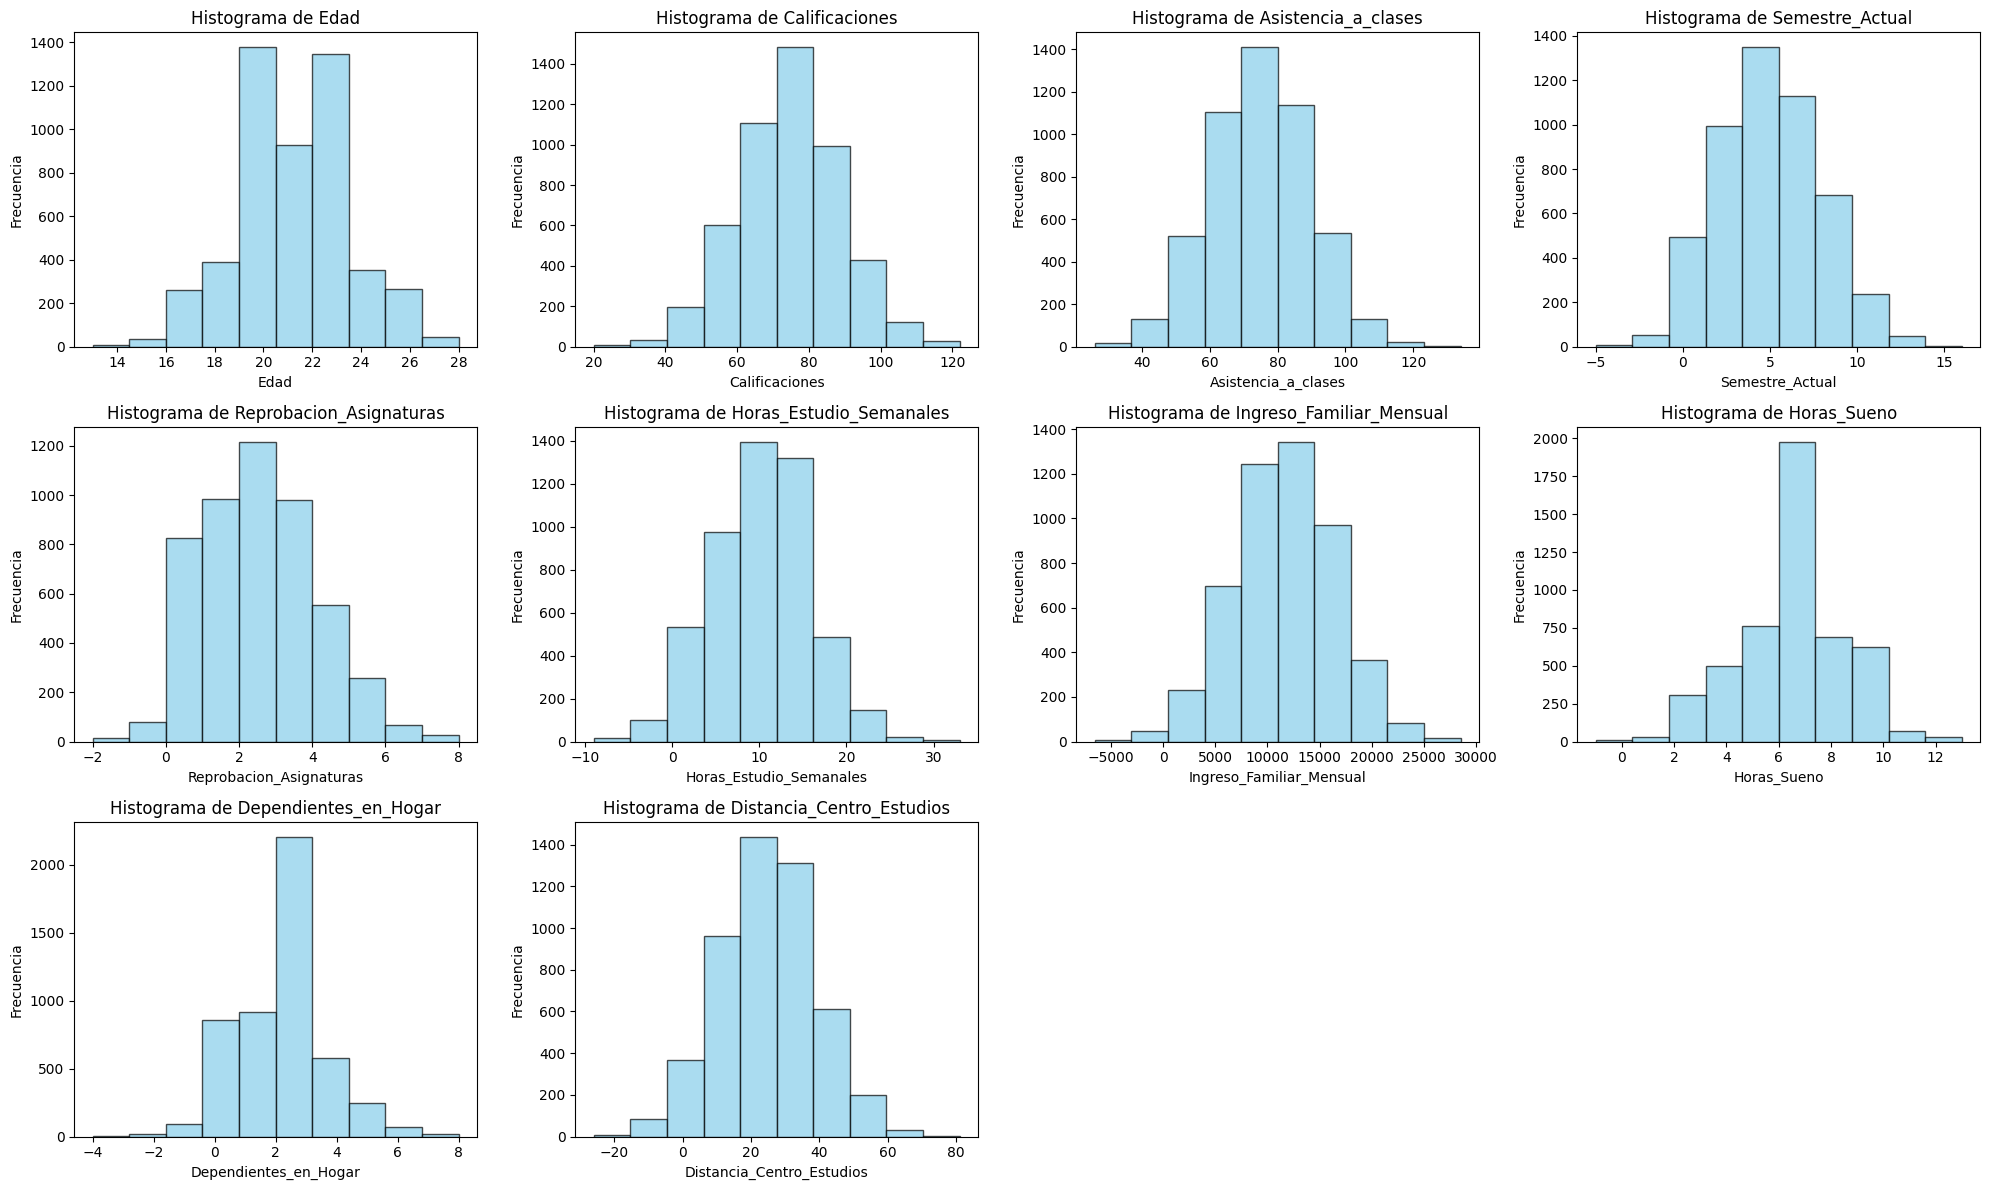

In [27]:
f_histograma_multiple_matriz(datos)

## Histograma de variables cuantitativas de interés

### Edad


**Cuestionamientos:** ¿Qué se observa con los datos cuantitativos?, ¿qué análisis se hace?

El valor de la media muestral es aproximadamente 21.48 o lo que es lo mismo es el promedio de edad.

La mediana de la edad es de 21.

Se observan datos homogéneos entre 18 y 25 años con respecto a la edad

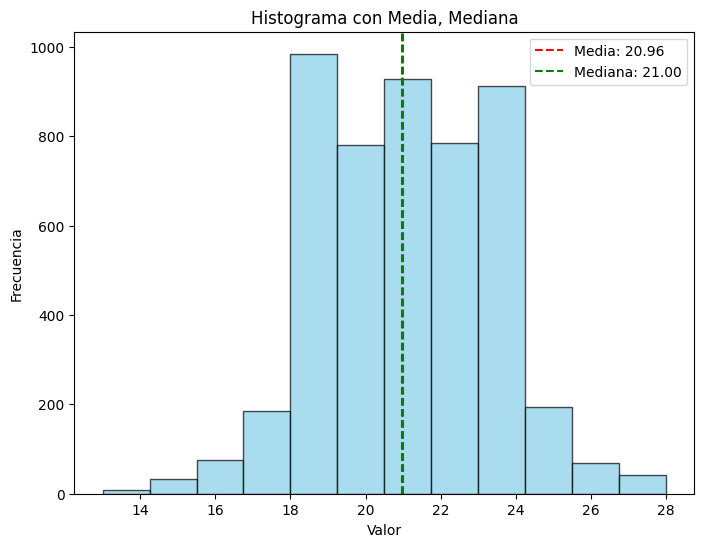

In [28]:
f_histograma(datos, 'Edad', 12)

Faltan mas variables numéricas y generar su histograma de cada una de ellas.

Pendiente

In [29]:
columnas_numericas = datos.select_dtypes(include=['number']).columns.tolist()
columnas_numericas

['Edad',
 'Calificaciones',
 'Asistencia_a_clases',
 'Semestre_Actual',
 'Reprobacion_Asignaturas',
 'Horas_Estudio_Semanales',
 'Ingreso_Familiar_Mensual',
 'Horas_Sueno',
 'Dependientes_en_Hogar',
 'Distancia_Centro_Estudios']

## Explorar y analizar variables cualitativas

**Cuestionamientos:** ¿Qué se observa con los datos cualitativos?, ¿qué análisis se hace?

### Estado_Civil

In [30]:
tabla = f_tabla_frecuencia(datos, 'Estado_Civil')
tabla

,Estado_Civil,Frecuencia_Absoluta,Frecuencia_Relativa,Frecuencia_Porcentual,Frecuencia_Acumulada,Frecuencia_Porcentual_Acumulada
0,Casado/a,1717,0.3434,34.34,1717,34.34
1,Soltero/a,1649,0.3298,32.98,3366,67.32
2,Unión Libre,1634,0.3268,32.68,5000,100.00


Aproximadamente el 34% de los datos recabados son proestudiantes casados, el 32% solkteros y el 32% vive en unión libre.


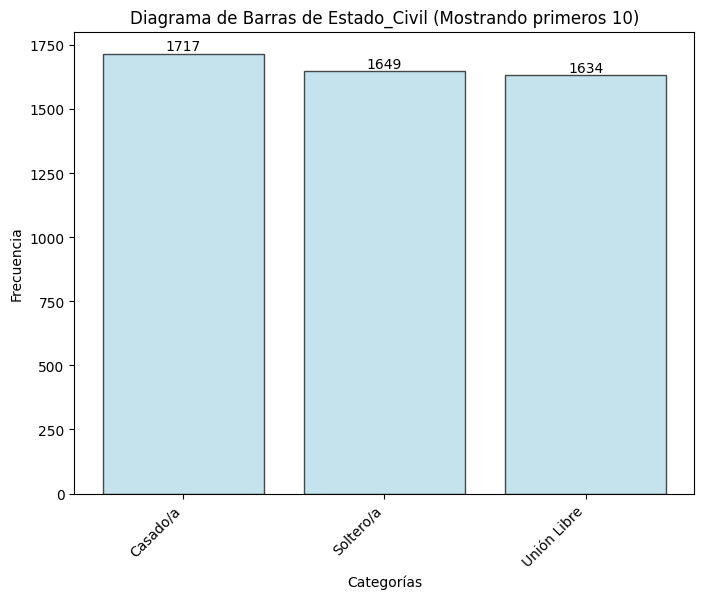

In [31]:
f_barra(datos, 'Estado_Civil')

### Lugar_Residencia


In [ ]:
tabla = f_tabla_frecuencia(datos, 'Lugar_Residencia')
tabla

,Lugar_Residencia,Frecuencia_Absoluta,Frecuencia_Relativa,Frecuencia_Porcentual,Frecuencia_Acumulada,Frecuencia_Porcentual_Acumulada
0,Foráneo,2577,0.5154,51.54,2577,51.54
1,Local,2423,0.4846,48.46,5000,100.00


Aproximadamente el 51% de los datos recabados foráneos y el 48% vive localmente cerca de su Institución educativa.

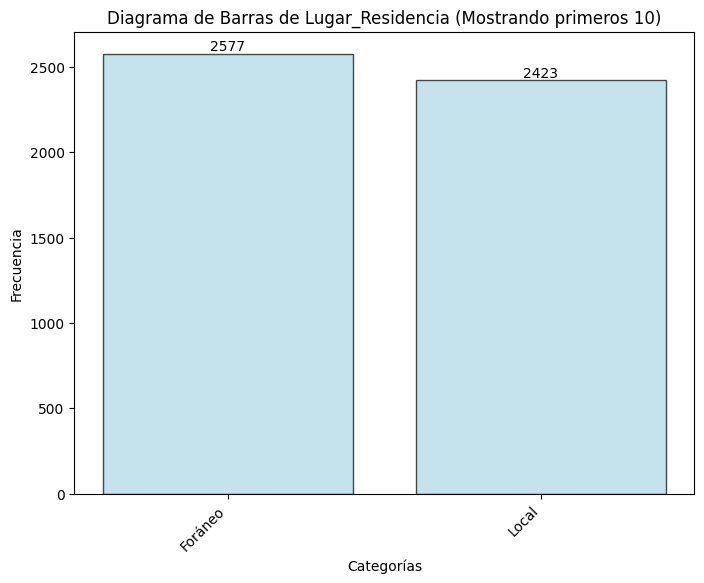

In [ ]:
f_barra(datos, 'Lugar_Residencia')

### Nivel_Socioeconomico


In [ ]:
tabla = f_tabla_frecuencia(datos, 'Nivel_Socioeconomico')
tabla

,Nivel_Socioeconomico,Frecuencia_Absoluta,Frecuencia_Relativa,Frecuencia_Porcentual,Frecuencia_Acumulada,Frecuencia_Porcentual_Acumulada
0,Bajo,1763,0.3526,35.26,1763,35.26
1,Medio,1644,0.3288,32.88,3407,68.14
2,Alto,1593,0.3186,31.86,5000,100.00


Del total de los datos de la muestra, aproximadamente el 35% tiene un nivel económico bajo; un 32% nivel ecoómico medio y un 31% nivel económico alto.

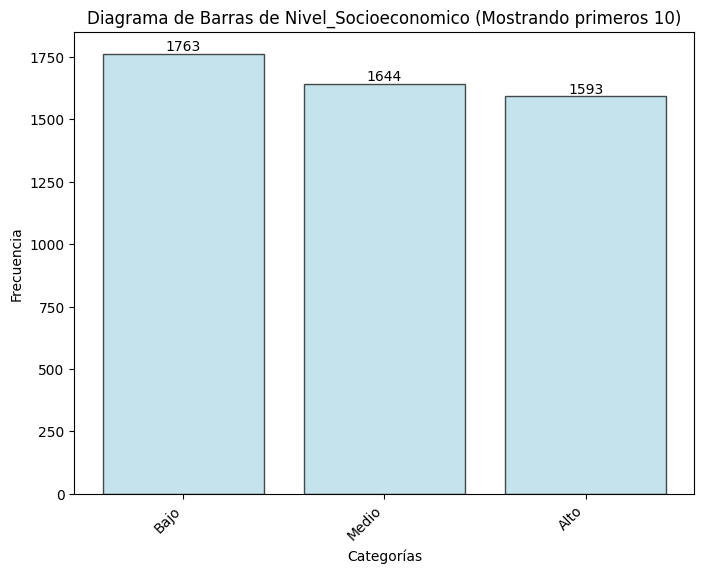

In [ ]:
f_barra(datos, 'Nivel_Socioeconomico')

### Apoyo_Financiero



In [ ]:
tabla = f_tabla_frecuencia(datos, 'Apoyo_Financiero')
tabla

,Apoyo_Financiero,Frecuencia_Absoluta,Frecuencia_Relativa,Frecuencia_Porcentual,Frecuencia_Acumulada,Frecuencia_Porcentual_Acumulada
0,No,2507,0.5014,50.14,2507,50.14
1,Sí,2493,0.4986,49.86,5000,100.00


Aproximadamente el 50% de los datos de la muestra son estudiantes que reciben apoyo financiero y el 49% no.



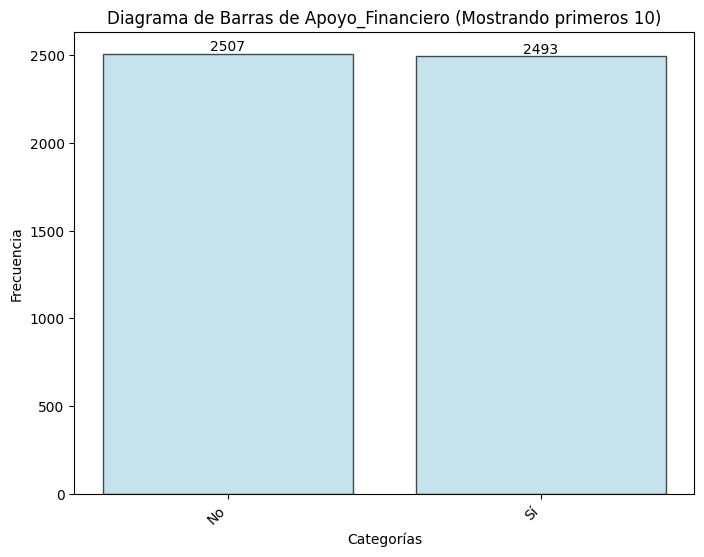

In [ ]:
f_barra(datos, 'Apoyo_Financiero')

### Empleo_Parcial_o_Tiempo_Completo

In [ ]:
tabla = f_tabla_frecuencia(datos, 'Empleo_Parcial_o_Tiempo_Completo')
tabla

,Empleo_Parcial_o_Tiempo_Completo,Frecuencia_Absoluta,Frecuencia_Relativa,Frecuencia_Porcentual,Frecuencia_Acumulada,Frecuencia_Porcentual_Acumulada
0,Sí,2527,0.5054,50.54,2527,50.54
1,No,2473,0.4946,49.46,5000,100.00


El 50% trabaja y el 49% no.

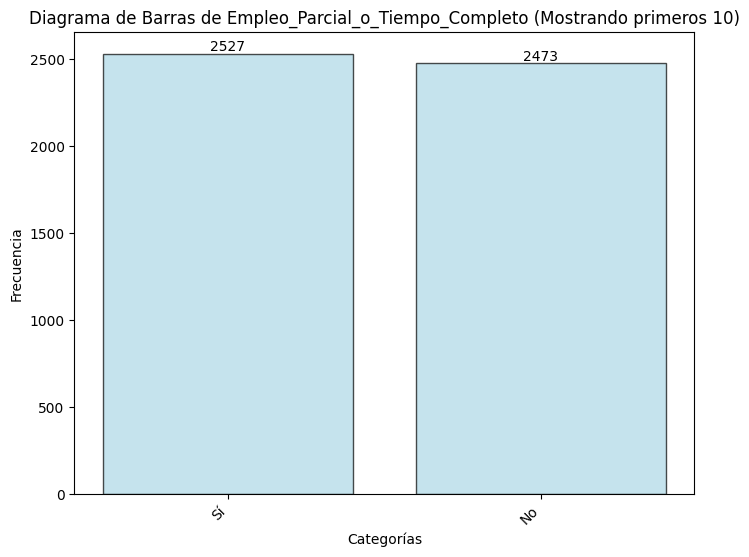

In [ ]:
f_barra(datos, 'Empleo_Parcial_o_Tiempo_Completo')

### Red_Apoyo_Social  

In [ ]:
tabla = f_tabla_frecuencia(datos, 'Red_Apoyo_Social')
tabla

,Red_Apoyo_Social,Frecuencia_Absoluta,Frecuencia_Relativa,Frecuencia_Porcentual,Frecuencia_Acumulada,Frecuencia_Porcentual_Acumulada
0,Moderado,1704,0.3408,34.08,1704,34.08
1,Débil,1666,0.3332,33.32,3370,67.40
2,Fuerte,1630,0.3260,32.60,5000,100.00


El 34% de los estudiantes tiene apoyo social moderado; el 33% un apoyo débil y el 32% tiene un apoyo social fuerte.

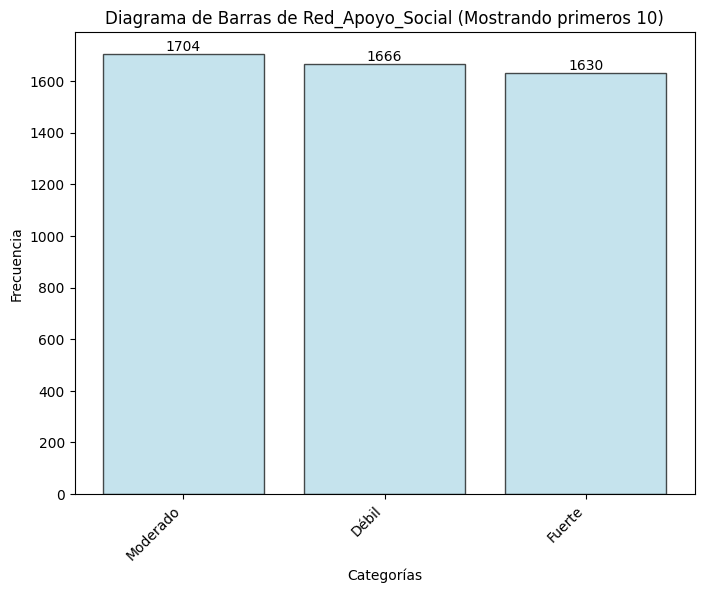

In [ ]:
f_barra(datos, 'Red_Apoyo_Social', mostrar='primeros')

### Participacion_Extracurricular

In [ ]:
tabla = f_tabla_frecuencia(datos, 'Participacion_Extracurricular')
tabla

,Participacion_Extracurricular,Frecuencia_Absoluta,Frecuencia_Relativa,Frecuencia_Porcentual,Frecuencia_Acumulada,Frecuencia_Porcentual_Acumulada
0,Baja,1697,0.3394,33.94,1697,33.94
1,Alta,1683,0.3366,33.66,3380,67.60
2,Media,1620,0.3240,32.40,5000,100.00


Con respecto a la actividad extracurricular del estudiante, el 33% tienen una actividad baja; el 33% alta y el 32% actividad media.

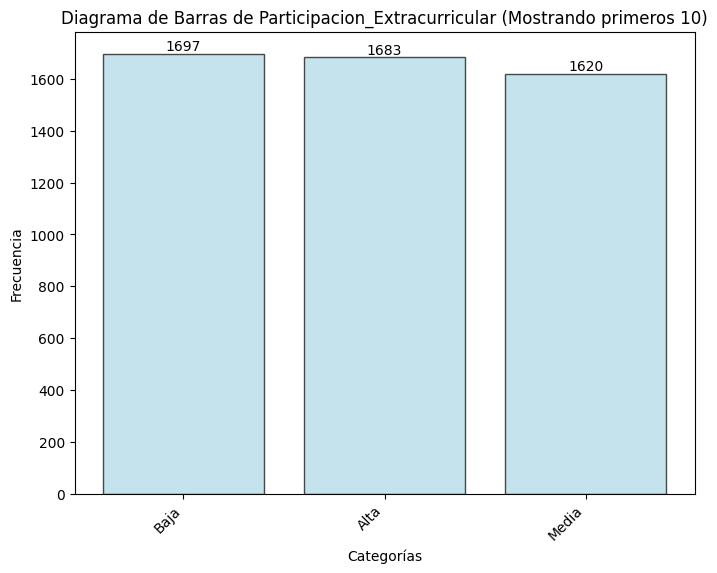

In [ ]:
f_barra(datos, 'Participacion_Extracurricular')

## Análisis descriptivio visual de todas las variables cualitativas

Con la funci´pon *select_dtypes()* se selecciona solo las variables categóricas *object*.


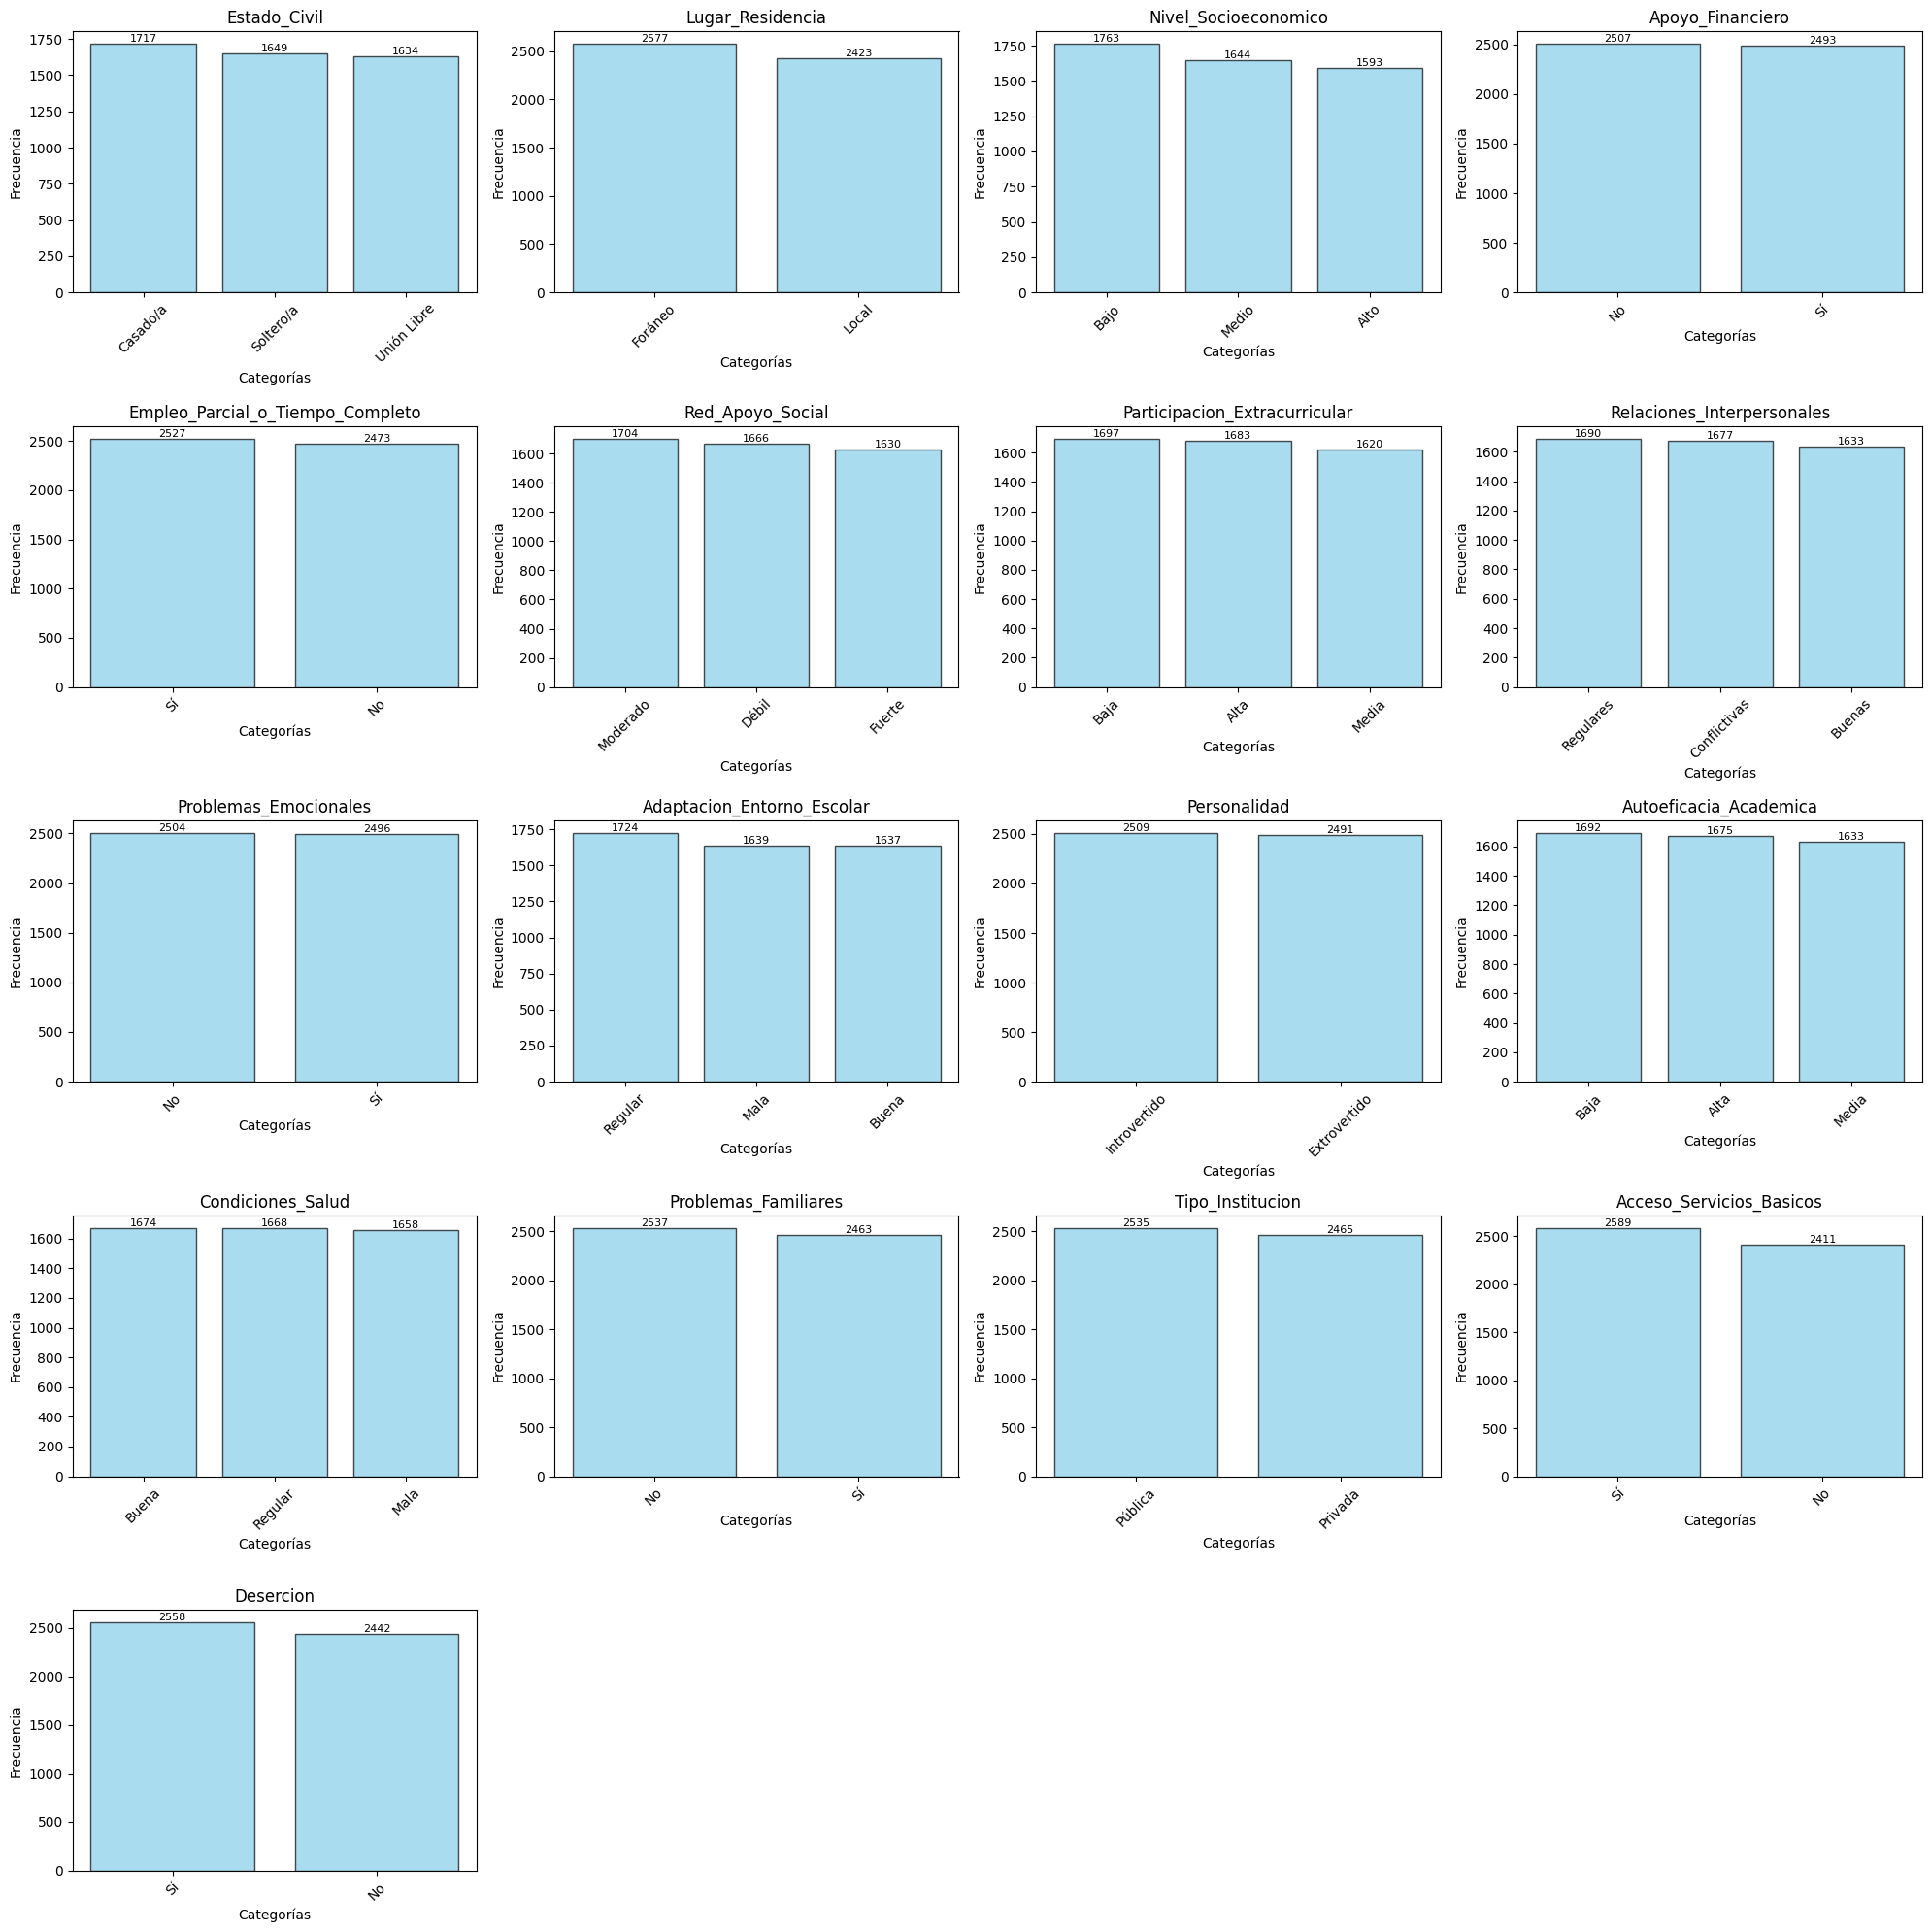

In [32]:
columnas_categoricas = datos.select_dtypes(include=['object', 'category']).columns.tolist()
columnas_categoricas
f_barra_multiple_matriz (datos, variables=columnas_categoricas, color='skyblue', mostrar='primeros')

# Interpretación

Con estos datos conteste y describa las siguientes preguntas:

* Pendiente


